# Final Project Susulan

### Oleh : Ridho Lailatul Akbar 

Penjelasan kolom fitur:

*   Negara : Nama negara   
*   Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
*   Ekspor : Ekspor barang dan jasa perkapita
*   Kesehatan: Total pengeluaran kesehatan perkapita
*   Impor: Impor barang dan jasa perkapita
*   Pendapatan: Penghasilan bersih perorang
*   Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
*   Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
*   Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
*   GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 
 

# Pre-Processing Data

In [2]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [3]:
# Import csv file
data = pd.read_csv('Data_Negara_HELP.csv')

In [5]:
# Display data
display(data)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
# Cek info data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# EDA (Exploratory Data Analysis)

In [7]:
# Pengecekan nilai null atau data yang bolong
data.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [8]:
# Pengecekan keunikan tiap kolom
data['Negara'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [9]:
data['Kematian_anak'].unique()

array([ 90.2,  16.6,  27.3, 119. ,  10.3,  14.5,  18.1,   4.8,   4.3,
        39.2,  13.8,   8.6,  49.4,  14.2,   5.5,   4.5,  18.8, 111. ,
        42.7,  46.6,   6.9,  52.5,  19.8,  10.5,  10.8, 116. ,  93.6,
        44.4, 108. ,   5.6,  26.5, 149. , 150. ,   8.7,  15.7,  18.6,
        88.2,  63.9,  10.2,   3.6,   3.4,   4.1,  34.4,  25.1,  29.1,
        19.2,  55.2,  24.1,   3. ,   4.2,  63.7,  80.3,  16.5,  74.7,
         3.9,  14.6,  35.4, 109. , 114. ,  37.6, 208. ,   6. ,   2.6,
        58.8,  33.3,  19.3,  36.9,   4.6,   4. ,   3.2,  21.1,  21.5,
        62.2,  62.7,  29.6,  78.9,   7.8,  99.7,  89.3,   6.1,   2.8,
        10.4,  90.5,   7.9,  13.2, 137. ,   6.8,  97.4,  15. ,  40. ,
        17.2,  26.1,  33.5, 101. ,  64.4,  56. ,  47. ,   6.2, 123. ,
       130. ,  11.7,  92.1,  19.7,  20.3,  31.9,   9. ,  11.5,  10. ,
        63.6,  18.9,  66.8,   7.6,  14.4, 160. ,   7. ,  28.1,  53.7,
         3.8,  11.2,  20.7,  76.7,  52.4,  71.9,  14.9,  62.6,  90.3,
        17.4,  19.1,

In [10]:
data['Ekspor'].unique()

array([1.00e+01, 2.80e+01, 3.84e+01, 6.23e+01, 4.55e+01, 1.89e+01,
       2.08e+01, 1.98e+01, 5.13e+01, 5.43e+01, 3.50e+01, 6.95e+01,
       1.60e+01, 3.95e+01, 5.14e+01, 7.64e+01, 5.82e+01, 2.38e+01,
       4.25e+01, 4.12e+01, 2.97e+01, 4.36e+01, 1.07e+01, 6.74e+01,
       5.02e+01, 1.92e+01, 8.92e+00, 5.41e+01, 2.22e+01, 2.91e+01,
       3.27e+01, 1.18e+01, 3.68e+01, 3.77e+01, 2.63e+01, 1.59e+01,
       1.65e+01, 4.11e+01, 8.51e+01, 3.32e+01, 5.06e+01, 3.76e+01,
       6.60e+01, 5.05e+01, 2.27e+01, 2.79e+01, 2.13e+01, 2.69e+01,
       8.58e+01, 4.79e+00, 7.51e+01, 5.78e+01, 3.87e+01, 2.68e+01,
       5.77e+01, 4.23e+01, 2.95e+01, 2.21e+01, 2.58e+01, 3.03e+01,
       1.49e+01, 1.53e+01, 8.18e+01, 5.34e+01, 2.26e+01, 2.43e+01,
       2.44e+01, 3.94e+01, 1.03e+02, 2.52e+01, 3.13e+01, 1.50e+01,
       4.83e+01, 4.42e+01, 2.07e+01, 1.33e+01, 6.67e+01, 5.16e+01,
       3.54e+01, 5.37e+01, 3.58e+01, 1.91e+01, 6.56e+01, 6.53e+01,
       1.75e+02, 3.98e+01, 2.50e+01, 2.28e+01, 8.69e+01, 7.76e

In [11]:
data['Kesehatan'].unique()

array([ 7.58,  6.55,  4.17,  2.85,  6.03,  8.1 ,  4.4 ,  8.73, 11.  ,
        5.88,  7.89,  4.97,  3.52,  7.97,  5.61, 10.7 ,  5.2 ,  4.1 ,
        4.84, 11.1 ,  8.3 ,  9.01,  2.84,  6.87,  6.74, 11.6 ,  5.68,
        5.13, 11.3 ,  4.09,  3.98,  4.53,  7.96,  5.07,  7.59,  4.51,
        7.91,  2.46, 10.9 ,  5.3 ,  7.76,  5.97,  7.88, 11.4 ,  6.22,
        8.06,  4.66,  6.91,  4.48,  2.66,  4.86,  8.95, 11.9 ,  3.5 ,
        5.69, 10.1 ,  5.22, 10.3 ,  5.86,  6.85,  4.93,  8.5 ,  5.38,
        7.33,  9.4 ,  4.05,  2.61,  5.6 ,  8.41,  9.19,  7.63,  9.53,
        4.81,  9.49,  8.04,  4.29,  4.75,  2.63,  6.18,  4.47,  6.68,
        7.03, 11.8 ,  3.88,  7.04,  7.77,  7.09,  3.77,  6.59,  4.39,
        6.33,  4.98,  8.65,  4.41,  6.  , 14.2 , 11.7 ,  5.44,  9.11,
        5.21,  1.97,  6.78,  5.25,  5.16,  9.48,  2.77,  2.2 ,  5.87,
        5.08,  3.61,  7.46,  1.81,  5.58, 10.5 ,  6.47,  5.66, 10.4 ,
        3.4 , 13.1 ,  3.96,  8.79,  9.41,  8.55,  8.94,  6.93,  9.54,
        2.94,  6.32,

In [12]:
data['Impor'].unique()

array([4.49e+01, 4.86e+01, 3.14e+01, 4.29e+01, 5.89e+01, 1.60e+01,
       4.53e+01, 2.09e+01, 4.78e+01, 2.07e+01, 4.37e+01, 5.09e+01,
       2.18e+01, 4.87e+01, 6.45e+01, 7.47e+01, 5.75e+01, 3.72e+01,
       7.07e+01, 3.43e+01, 5.13e+01, 1.18e+01, 2.80e+01, 5.30e+01,
       2.96e+01, 3.92e+01, 5.95e+01, 2.70e+01, 3.10e+01, 6.18e+01,
       2.65e+01, 4.35e+01, 3.13e+01, 2.26e+01, 1.78e+01, 5.17e+01,
       4.96e+01, 5.47e+01, 3.50e+01, 4.33e+01, 3.81e+01, 6.29e+01,
       4.36e+01, 3.33e+01, 3.24e+01, 2.66e+01, 4.66e+01, 2.33e+01,
       6.87e+01, 6.39e+01, 3.74e+01, 2.81e+01, 1.89e+01, 4.27e+01,
       5.28e+01, 3.71e+01, 4.59e+01, 3.07e+01, 4.92e+01, 3.63e+01,
       4.32e+01, 3.52e+01, 7.91e+01, 6.47e+01, 7.65e+01, 2.71e+01,
       2.24e+01, 1.94e+01, 3.41e+01, 8.65e+01, 3.29e+01, 2.72e+01,
       1.36e+01, 6.90e+01, 2.99e+01, 3.36e+01, 7.99e+01, 3.04e+01,
       8.17e+01, 4.93e+01, 5.51e+01, 6.02e+01, 1.01e+02, 9.26e+01,
       4.21e+01, 6.72e+01, 1.42e+02, 5.81e+01, 4.30e+01, 3.49e

In [13]:
data['Pendapatan'].unique()

array([  1610,   9930,  12900,   5900,  19100,  18700,   6700,  41400,
        43200,  16000,  22900,  41100,   2440,  15300,  16200,   7880,
         1820,   6420,   5410,   9720,  13300,  14500,  80600,   1430,
          764,   2520,   2660,  40700,   5830,    888,   1930,  19400,
         9530,  10900,   1410,    609,   5190,  13000,   2690,  20100,
        33900,  28300,  44000,  11100,   9350,   9860,   7300,  33700,
         1420,  22700,   7350,  39800,  36900,  15400,   1660,   6730,
        40400,   3060,  28700,  11200,   6710,   1190,   1390,   5840,
         1500,  22300,  38800,   4410,   8430,  17400,  12700,  45700,
        29600,  36200,   8000,  35800,   9470,   2480,   1730,  75200,
         2790,   3980,  18300,  16300,   2380,    700,  21100,  91700,
        11400,   1030,  10500,   1870,   3320,  15900,   3340,   3910,
         7710,  14000,   6440,    918,   3720,   8460,   1990,  45500,
        32300,    814,   5150,  62300,  45300,   4280,   7290,   9960,
      

In [14]:
data['Inflasi'].unique()

array([ 9.44e+00,  4.49e+00,  1.61e+01,  2.24e+01,  1.44e+00,  2.09e+01,
        7.77e+00,  1.16e+00,  8.73e-01,  1.38e+01, -3.93e-01,  7.44e+00,
        7.14e+00,  3.21e-01,  1.51e+01,  1.88e+00,  1.14e+00,  8.85e-01,
        5.99e+00,  8.78e+00,  1.40e+00,  8.92e+00,  8.41e+00,  1.67e+01,
        1.11e+00,  6.81e+00,  1.23e+01,  3.12e+00,  1.91e+00,  2.87e+00,
        5.05e-01,  2.01e+00,  6.39e+00,  8.96e+00,  6.94e+00,  3.86e+00,
        3.87e+00,  2.08e+01,  2.07e+01,  6.57e+00,  5.39e+00,  8.21e-01,
       -1.43e+00,  3.22e+00,  5.44e+00,  7.47e+00,  1.01e+01,  2.65e+00,
        2.49e+01,  1.16e+01,  1.74e+00,  4.23e+00,  3.51e-01,  1.05e+00,
        1.66e+01,  4.30e+00,  8.55e+00,  7.58e-01,  6.73e-01,  4.80e-01,
        5.14e+00,  2.97e+00,  5.73e+00,  5.45e+00,  2.33e+00,  5.47e+00,
        8.98e+00,  1.53e+01,  1.59e+01, -3.22e+00,  1.77e+00,  3.19e-01,
        9.81e+00, -1.90e+00,  8.43e+00,  1.95e+01,  2.09e+00,  1.52e+00,
        1.12e+01,  1.00e+01,  9.20e+00, -8.12e-01, 

In [15]:
data['Harapan_hidup'].unique()

array([56.2, 76.3, 76.5, 60.1, 76.8, 75.8, 73.3, 82. , 80.5, 69.1, 73.8,
       76. , 70.4, 76.7, 80. , 71.4, 61.8, 72.1, 71.6, 57.1, 74.2, 77.1,
       73.9, 57.9, 57.7, 66.1, 57.3, 81.3, 72.5, 47.5, 56.5, 79.1, 74.6,
       76.4, 65.9, 57.5, 60.4, 80.4, 56.3, 79.9, 77.5, 79.5, 70.5, 74.1,
       60.9, 61.7, 65.3, 81.4, 62.9, 65.5, 72.8, 80.1, 62.2, 71.3, 58. ,
       55.6, 32.1, 74.5, 66.2, 69.9, 67.2, 81.7, 74.7, 82.8, 68.4, 62.8,
       60.7, 78.2, 68.5, 63.8, 73.1, 79.8, 46.5, 60.8, 76.1, 73.2, 74. ,
       53.1, 77.9, 59.5, 80.3, 68.2, 73.4, 65.4, 69.7, 73.5, 54.5, 66.8,
       58.6, 68.3, 80.7, 80.9, 58.8, 60.5, 81. , 77.8, 69. , 73.7, 69.2,
       64.6, 71.5, 75.1, 64. , 55. , 82.7, 75.5, 54.3, 81.9, 74.4, 66.3,
       70.3, 81.5, 82.2, 69.6, 59.3, 76.6, 71.1, 58.7, 76.9, 67.9, 56.8,
       78.7, 68.8, 63. , 75.4, 67.5, 52. ])

In [16]:
data['Jumlah_fertiliti'].unique()

array([5.82, 1.65, 2.89, 6.16, 2.13, 2.37, 1.69, 1.93, 1.44, 1.92, 1.86,
       2.16, 2.33, 1.78, 1.49, 2.71, 5.36, 2.38, 3.2 , 1.31, 2.88, 1.8 ,
       1.84, 1.57, 5.87, 6.26, 5.11, 1.63, 2.67, 5.21, 6.59, 1.88, 1.59,
       2.01, 4.75, 6.54, 4.95, 5.27, 1.55, 1.42, 1.51, 1.87, 2.6 , 2.66,
       3.19, 2.27, 4.61, 1.72, 2.03, 4.08, 5.71, 1.39, 4.27, 1.48, 2.24,
       3.38, 5.34, 5.05, 2.65, 3.33, 1.25, 2.2 , 2.48, 1.76, 4.56, 2.05,
       3.03, 1.46, 2.17, 3.66, 4.37, 3.84, 2.21, 3.1 , 3.15, 1.36, 1.61,
       3.3 , 5.02, 2.41, 1.5 , 1.47, 4.6 , 5.31, 2.15, 2.23, 6.55, 4.98,
       3.46, 1.27, 2.64, 1.77, 2.58, 5.56, 3.6 , 2.61, 1.79, 7.49, 5.84,
       1.95, 2.9 , 3.85, 2.62, 2.73, 2.54, 3.16, 1.41, 2.07, 4.51, 4.34,
       2.96, 5.06, 1.4 , 5.2 , 1.15, 1.43, 4.24, 2.59, 1.23, 1.37, 4.88,
       2.52, 1.98, 1.52, 3.51, 5.43, 6.23, 4.87, 3.91, 2.14, 2.83, 6.15,
       2.08, 2.34, 3.5 , 2.47, 4.67, 5.4 ])

In [17]:
data['GDPperkapita'].unique()

array([   553,   4090,   4460,   3530,  12200,  10300,   3220,  51900,
        46900,   5840,  28000,  20700,    758,  16000,   6030,  44400,
         4340,   2180,   1980,   4610,   6350,  11200,  35300,   6840,
          575,    231,    786,   1310,  47400,   3310,    446,    897,
        12900,   4560,   6250,    769,    334,   2740,   8200,   1220,
        13500,  30800,  19800,  58000,   5450,   4660,   2600,   2990,
        17100,    482,  14600,   3650,  46200,  40600,   8750,    562,
         2960,  41800,  26900,   7370,   2830,    648,    547,   3040,
          662,  13100,  41900,   1350,   3110,   6530,   4500,  48700,
        30600,  35800,   4680,  44500,   3680,   9070,    967,   1490,
        38500,    880,   1140,  11300,   8860,   1170,    327,  12100,
        12000, 105000,   4540,    413,    459,   7100,    708,  21100,
         1200,   8000,   2860,   1630,   2650,   6680,    419,    988,
         5190,    592,  50300,  33700,    348,   2330,  87800,  19300,
      

##### Tidak ditemukan data yang memiliki nilai null atau NaN maupun format yang tidak sesuai

## Univariate, Bivariate, dan Multivariate

In [18]:
# Set style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

### Univariate

In [20]:
# Mengambil kolom yang hanya berisi angka
col_angka = list(data.columns)
col_angka.remove('Negara') # Menghapus kolom negara karena bukan angka
col_angka

['Kematian_anak',
 'Ekspor',
 'Kesehatan',
 'Impor',
 'Pendapatan',
 'Inflasi',
 'Harapan_hidup',
 'Jumlah_fertiliti',
 'GDPperkapita']

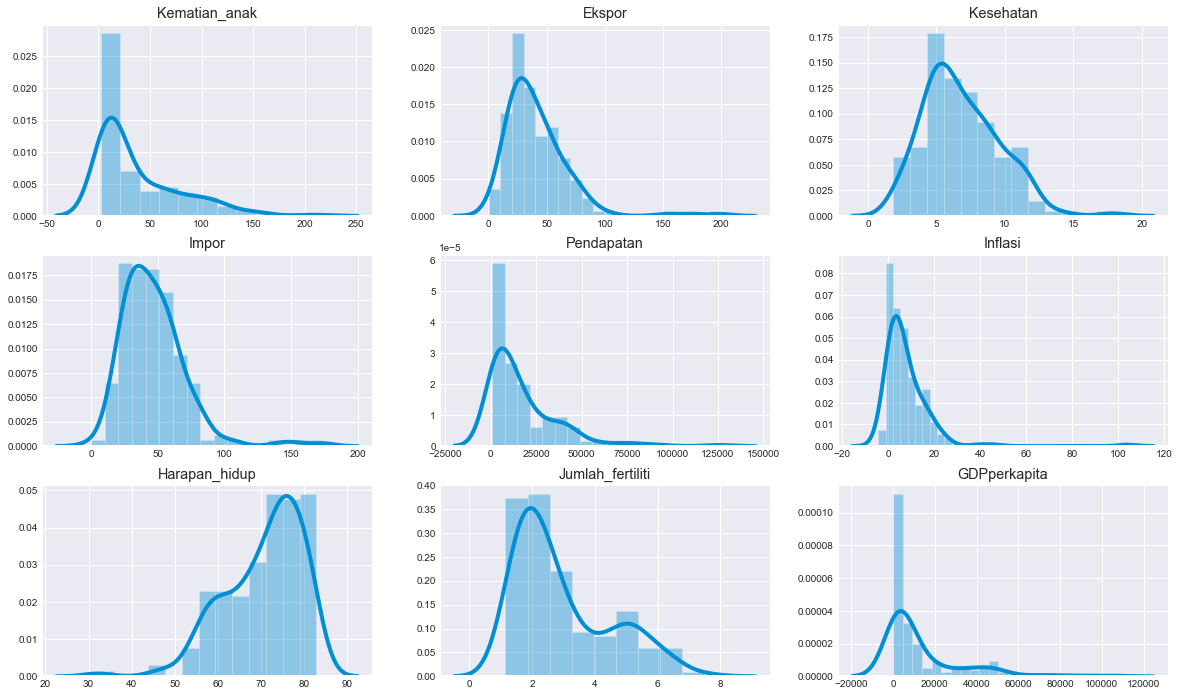

In [21]:
plt.figure(figsize=(18,12))
i = 1
for col in col_angka:
    plt.subplot(3, 3, i)
    sns.distplot(data[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    i+=1

plt.savefig('Univariate')

### Bivariate 

In [22]:
# Cek negara dengan tingkat kematian tinggi
kematian = data.sort_values(by=['Kematian_anak'], ascending=False).head(10)
kematian

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


In [23]:
# Cek negara dengan angka harapan hidup rendah
harapanhidup = data.sort_values(by=['Harapan_hidup'], ascending=True).head(10)
harapanhidup

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


In [24]:
# Cek negara dengan pendapatan rendah
pendapatan = data.sort_values(by=['Pendapatan'], ascending=True).head(10)
pendapatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [25]:
# Cek negara dengan angka import tinggi
impor = data.sort_values(by=['Impor'], ascending=False).head(10)
impor

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
88,Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
83,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790,10.000,68.5,3.10,880
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860


In [26]:
# Cek negara dengan angka eksport rendah
ekspor = data.sort_values(by=['Ekspor'], ascending=True).head(10)
ekspor

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
149,Timor-Leste,62.6,2.200,9.12,27.8000,1850,26.50,71.1,6.23,3600
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
26,Burundi,93.6,8.920,11.60,39.2000,764,12.30,57.7,6.26,231
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.10,68.3,2.61,592
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.44,56.2,5.82,553
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.01,47.5,5.21,446
126,Rwanda,63.6,12.000,10.50,30.0000,1350,2.61,64.6,4.51,563
151,Tonga,17.4,12.400,5.07,60.3000,4980,3.68,69.9,3.91,3550


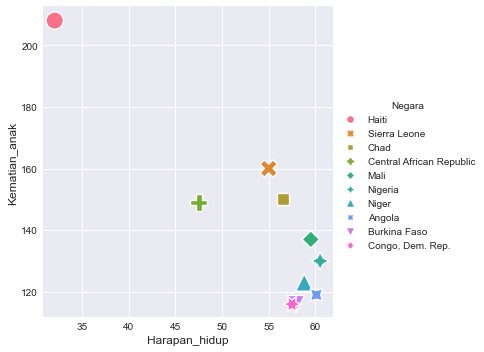

In [27]:
# Bivariate antara kematian anak dengan harapan hidup
sns.relplot(data = kematian, x='Harapan_hidup', y='Kematian_anak', hue='Negara', style='Negara', s=300)
plt.savefig('harapanhidup-kematian')

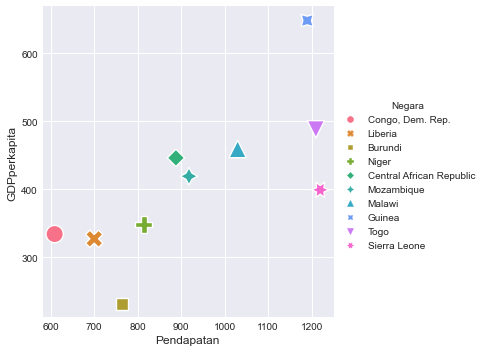

In [28]:
# Bivariate antara pendapatan dan GDP Perkapita
sns.relplot(data = pendapatan, x='Pendapatan', y='GDPperkapita', hue='Negara', style='Negara', s=300)
plt.savefig('pendapatan-gdpperkapita')

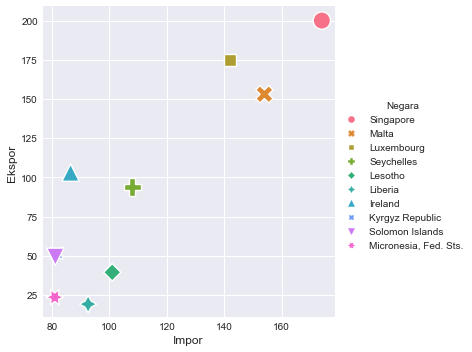

In [29]:
# Bivariate antara impor dan ekspor
sns.relplot(data = impor, x='Impor', y='Ekspor', hue='Negara', style='Negara', s=300)
plt.savefig('impor-ekspor')

### Multivariate

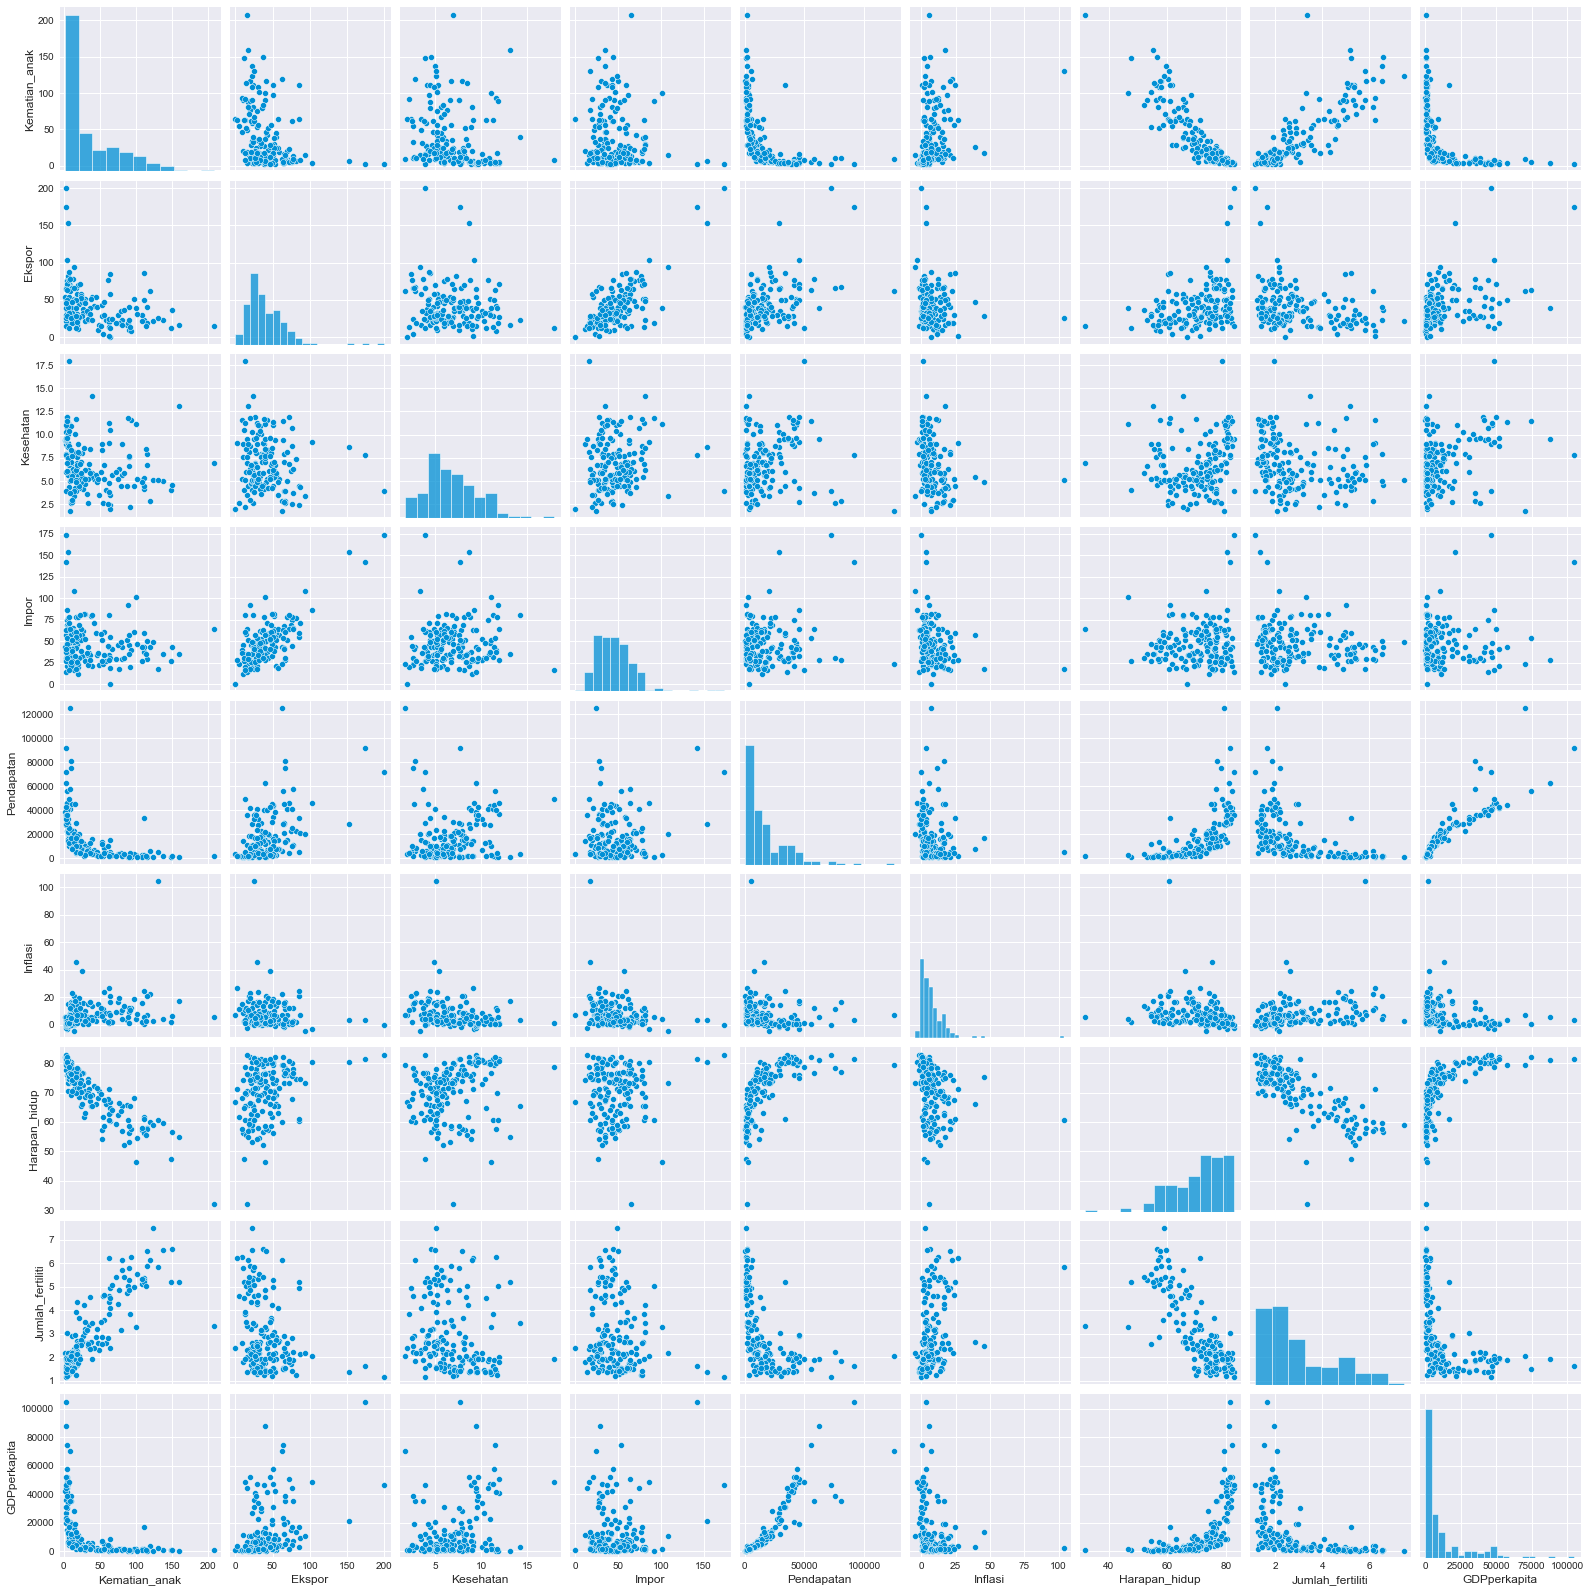

In [30]:
sns.pairplot(data, diag_kind='hist');
plt.savefig("Multivariate")

### Cek outlier data

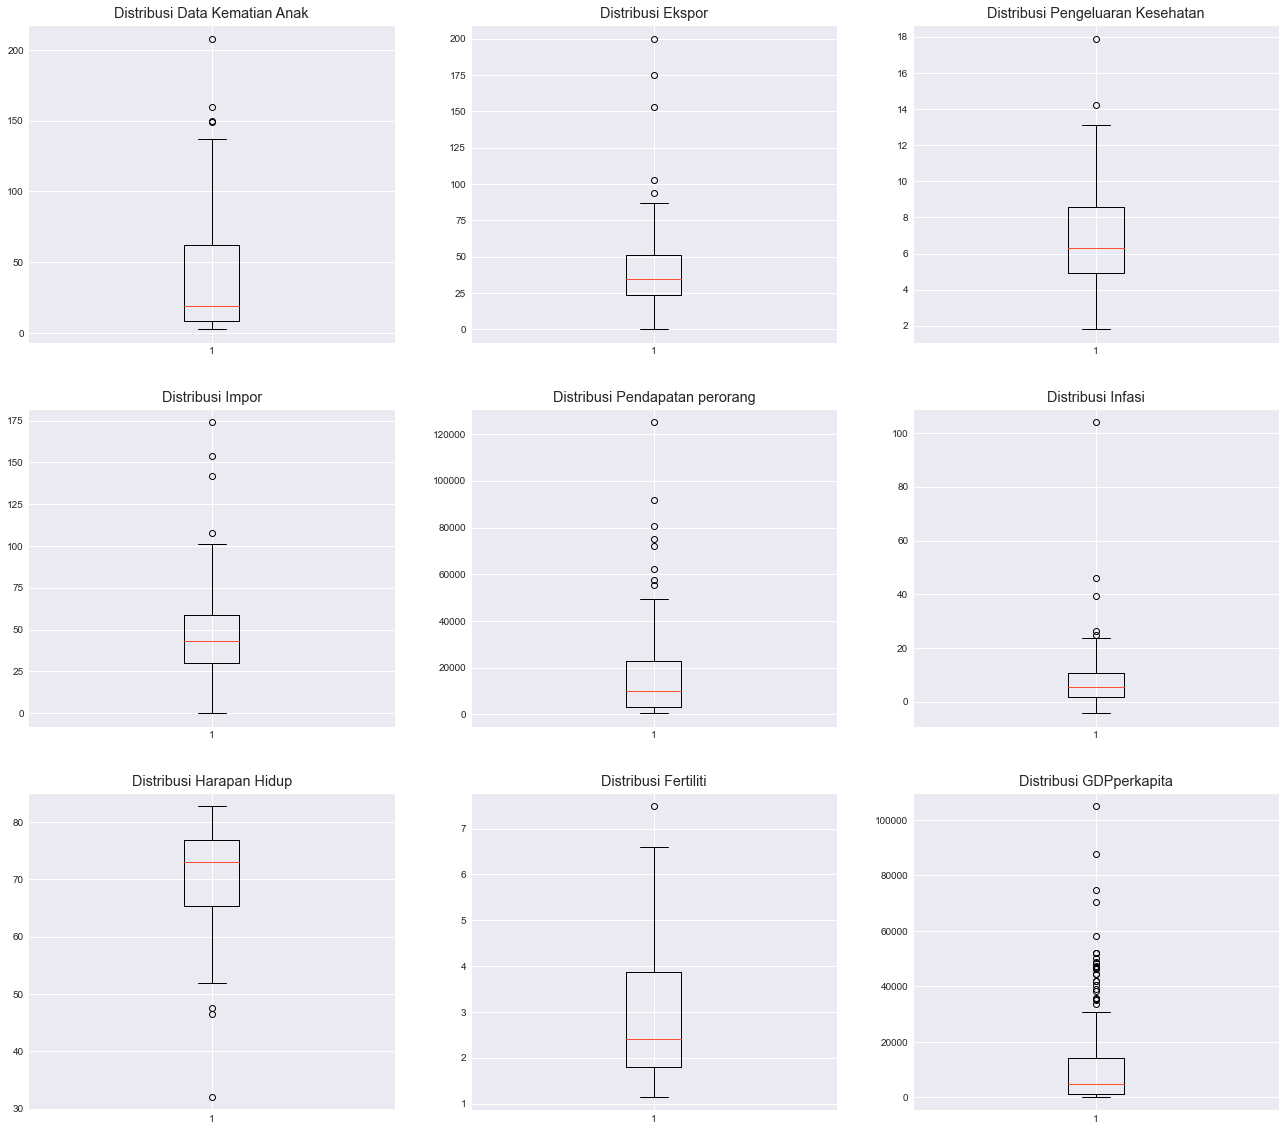

In [31]:
fig, ax = plt.subplots(figsize=(20,20),ncols=3,nrows=3)

ax[0][0].boxplot(data['Kematian_anak'])
ax[0][0].set_title('Distribusi Data Kematian Anak')

ax[0][1].boxplot(data['Ekspor'])
ax[0][1].set_title('Distribusi Ekspor')

ax[0][2].boxplot(data['Kesehatan'])
ax[0][2].set_title('Distribusi Pengeluaran Kesehatan')

ax[1][0].boxplot(data['Impor'])
ax[1][0].set_title('Distribusi Impor')

ax[1][1].boxplot(data['Pendapatan'])
ax[1][1].set_title('Distribusi Pendapatan perorang')

ax[1][2].boxplot(data['Inflasi'])
ax[1][2].set_title('Distribusi Infasi')

ax[2][0].boxplot(data['Harapan_hidup'])
ax[2][0].set_title('Distribusi Harapan Hidup')

ax[2][1].boxplot(data['Jumlah_fertiliti'])
ax[2][1].set_title('Distribusi Fertiliti')

ax[2][2].boxplot(data['GDPperkapita'])
ax[2][2].set_title('Distribusi GDPperkapita')

plt.savefig('sebelum-outlier')

In [32]:
# Fungsi untuk mencari outlier
def finding_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    df_final = data[(data<(Q1-(1.5*IQR))) | (data>(Q3+(1.5*IQR)))]
    return df_final

In [33]:
# Fungsi untuk menghapus outlier
def remove_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    df_final=data[~((data<(Q1-(1.5*IQR))) | (data>(Q3+(1.5*IQR))))]
    return df_final

In [34]:
datahapus=remove_outlier(data[['Negara',
 'Kematian_anak',
 'Ekspor',
 'Kesehatan',
 'Impor',
 'Pendapatan',
 'Inflasi',
 'Harapan_hidup',
 'Jumlah_fertiliti',
 'GDPperkapita']])

datahapus.dropna(axis=0, inplace=True)

In [35]:
display(datahapus)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


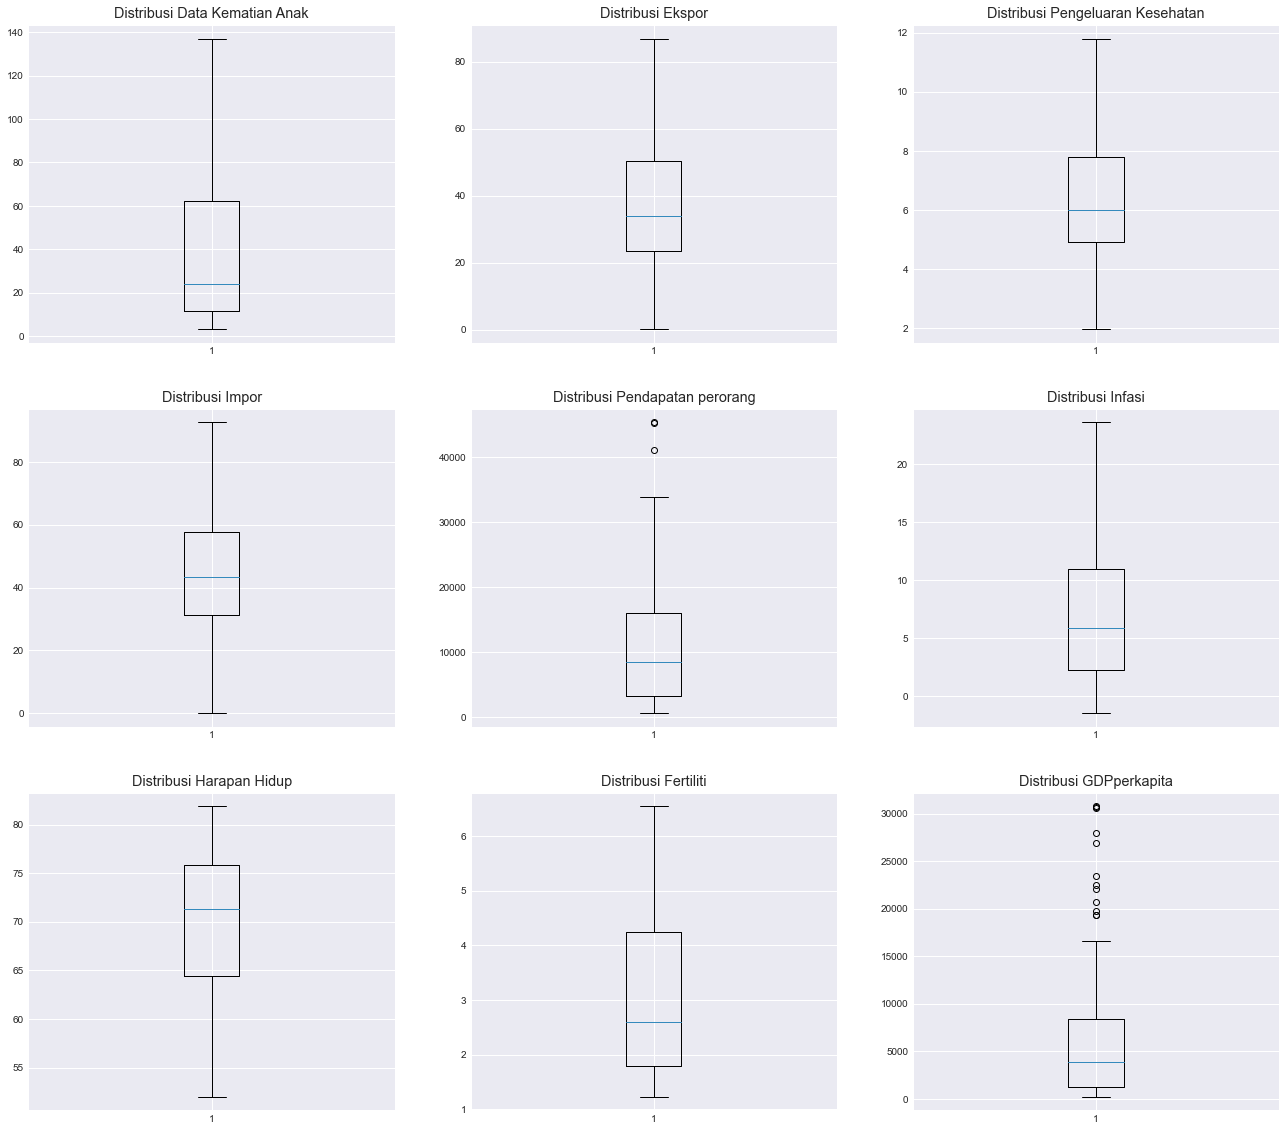

In [36]:
# Melihat data setelah penghapusan outlier
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20),ncols=3,nrows=3)
plt.style.use('ggplot')

ax[0][0].boxplot(datahapus['Kematian_anak'])
ax[0][0].set_title('Distribusi Data Kematian Anak')

ax[0][1].boxplot(datahapus['Ekspor'])
ax[0][1].set_title('Distribusi Ekspor')

ax[0][2].boxplot(datahapus['Kesehatan'])
ax[0][2].set_title('Distribusi Pengeluaran Kesehatan')

ax[1][0].boxplot(datahapus['Impor'])
ax[1][0].set_title('Distribusi Impor')

ax[1][1].boxplot(datahapus['Pendapatan'])
ax[1][1].set_title('Distribusi Pendapatan perorang')

ax[1][2].boxplot(datahapus['Inflasi'])
ax[1][2].set_title('Distribusi Infasi')

ax[2][0].boxplot(datahapus['Harapan_hidup'])
ax[2][0].set_title('Distribusi Harapan Hidup')

ax[2][1].boxplot(datahapus['Jumlah_fertiliti'])
ax[2][1].set_title('Distribusi Fertiliti')

ax[2][2].boxplot(datahapus['GDPperkapita'])
ax[2][2].set_title('Distribusi GDPperkapita')

plt.savefig('setelah-hapus')

### Cek korelasi data

#### Sebelum remove outlier

<AxesSubplot:>

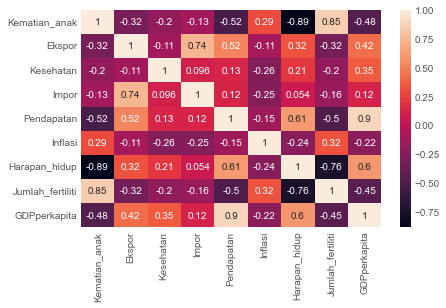

In [37]:
korelasi_sebelum = sns.heatmap(data.corr(), annot= True, fmt='.2g')
korelasi_sebelum

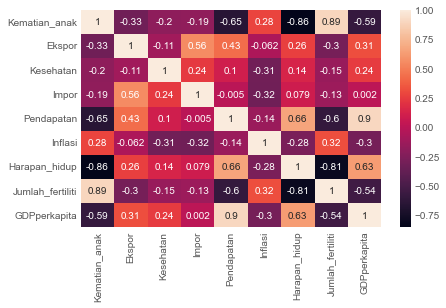

In [38]:
korelasi_sesudah = sns.heatmap(datahapus.corr(), annot= True, fmt='.2g')
plt.savefig('korelasi')

###### Baik sebelum maupun sesudah penghapusan outlier, korelasi data tetap menunjukan perbandigan yang hampir sama
Terdapat beberapa kolerasi kuat (baik positif maupun negatif) seperti pendapatan dan GDP perkapita, serta kematian anak dengan harapan hidup dan jumlah fertiliti

### Rescaling

In [39]:
datahapus1=pd.DataFrame(data=datahapus, columns=['Pendapatan','GDPperkapita'])
datahapus1

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
161,4240.0,1380.0
162,2950.0,2970.0
164,4490.0,1310.0
165,4480.0,1310.0


In [40]:
sc=StandardScaler()
datahapus1_std=sc.fit_transform(datahapus1.astype(float))

In [41]:
datahapus2=pd.DataFrame(data=datahapus, columns=['Kematian_anak','Harapan_hidup','Jumlah_fertiliti'])
datahapus2

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti
0,90.2,56.2,5.82
1,16.6,76.3,1.65
2,27.3,76.5,2.89
3,119.0,60.1,6.16
4,10.3,76.8,2.13
...,...,...,...
161,36.3,68.8,2.34
162,29.2,63.0,3.50
164,23.3,73.1,1.95
165,56.3,67.5,4.67


In [46]:
sc=StandardScaler()
datahapus2_std=sc.fit_transform(datahapus2.astype(float))

In [47]:
df_country_drop = datahapus.copy()
country = df_country_drop.pop('Negara')

In [48]:
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country_drop)

In [49]:
df_country1 = pd.DataFrame(df_country_scaled, columns = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])
df_country1.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561
1,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385
2,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376
3,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101
4,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593


# Model Build

## K-Means Clustering

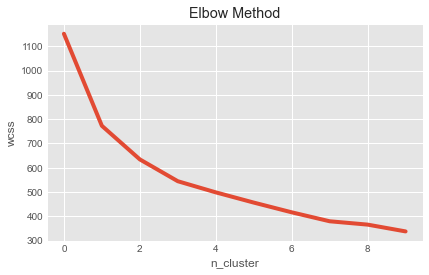

In [51]:
# Clustering dengan KMeans
wcss = []
for cluster in list(range(1,11)):
    model = KMeans(n_clusters= cluster, random_state=42)
    model.fit(df_country1)
    wcss.append(model.inertia_)


plt.plot(wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')
plt.savefig('Elbow')

In [52]:
kmeans1 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(datahapus1_std)
labels1 = kmeans1.labels_
labels1

array([1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1])

In [53]:
datahapus1['label1_kmeans']=labels1

In [54]:
datahapus1

,Pendapatan,GDPperkapita,label1_kmeans
0,1610.0,553.0,1
1,9930.0,4090.0,1
2,12900.0,4460.0,2
3,5900.0,3530.0,1
4,19100.0,12200.0,2
...,...,...,...
161,4240.0,1380.0,1
162,2950.0,2970.0,1
164,4490.0,1310.0,1
165,4480.0,1310.0,1


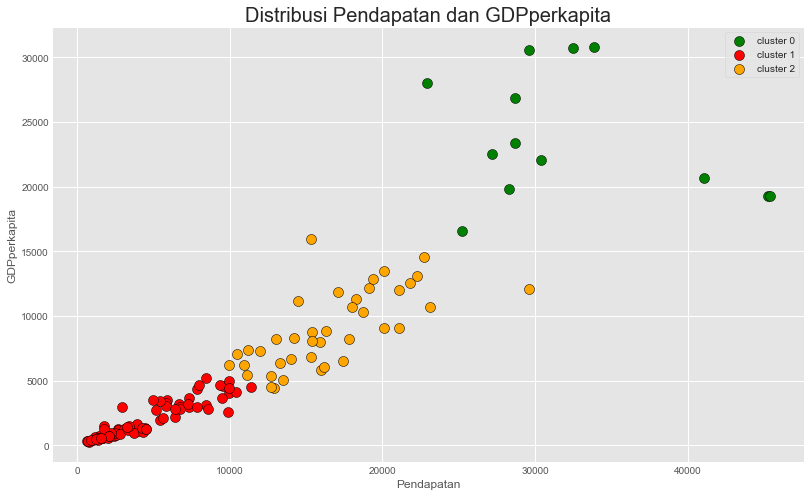

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.scatter(datahapus1['Pendapatan'][datahapus1.label1_kmeans == 0], 
            datahapus1['GDPperkapita'][datahapus1.label1_kmeans == 0],
           c='green', s=100, edgecolor='k', label='cluster 0')
plt.scatter(datahapus1['Pendapatan'][datahapus1.label1_kmeans == 1], 
            datahapus1['GDPperkapita'][datahapus1.label1_kmeans == 1],
           c='red', s=100, edgecolor='k', label='cluster 1')
plt.scatter(datahapus1['Pendapatan'][datahapus1.label1_kmeans == 2], 
            datahapus1['GDPperkapita'][datahapus1.label1_kmeans == 2],
           c='orange', s=100, edgecolor='k', label='cluster 2')

#plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], c='k', s=300 )

plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.title('Distribusi Pendapatan dan GDPperkapita', fontdict={'fontsize': 20})
plt.legend()

plt.savefig('Distribusi Pendapatan vs GDPperkapita')

In [56]:
kmeans2= KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(datahapus2_std)
labels2 = kmeans2.labels_
labels2

array([0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0])

In [57]:
datahapus2['label2_kmeans']=labels2
datahapus2

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti,label2_kmeans
0,90.2,56.2,5.82,0
1,16.6,76.3,1.65,1
2,27.3,76.5,2.89,1
3,119.0,60.1,6.16,0
4,10.3,76.8,2.13,1
...,...,...,...,...
161,36.3,68.8,2.34,2
162,29.2,63.0,3.50,2
164,23.3,73.1,1.95,1
165,56.3,67.5,4.67,2


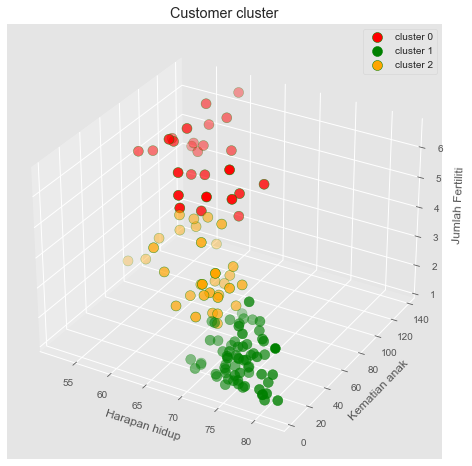

In [58]:
# Visualisasi 3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(datahapus2['Harapan_hidup'][datahapus2.label2_kmeans == 0], 
           datahapus2['Kematian_anak'][datahapus2.label2_kmeans == 0],
           datahapus2['Jumlah_fertiliti'][datahapus2.label2_kmeans == 0],
           c='red', s=100, edgecolor='green',label='cluster 0')
ax.scatter(datahapus2['Harapan_hidup'][datahapus2.label2_kmeans == 1], 
           datahapus2['Kematian_anak'][datahapus2.label2_kmeans == 1],
           datahapus2['Jumlah_fertiliti'][datahapus2.label2_kmeans == 1],
           c='green', s=100, edgecolor='green', label='cluster 1')
ax.scatter(datahapus2['Harapan_hidup'][datahapus2.label2_kmeans == 2], 
           datahapus2['Kematian_anak'][datahapus2.label2_kmeans == 2],
           datahapus2['Jumlah_fertiliti'][datahapus2.label2_kmeans == 2],
           c='orange', s=100, edgecolor='green', label='cluster 2')

plt.title('Customer cluster')
plt.xlabel('Harapan hidup')
plt.ylabel('Kematian anak')
ax.set_zlabel('Jumlah Fertiliti')
plt.legend()

plt.savefig('Customer cluster')

In [59]:
datafinal=pd.DataFrame(datahapus.iloc[:,0])
datafinal

,Negara
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
161,Uzbekistan
162,Vanuatu
164,Vietnam
165,Yemen


In [60]:
datafinal2=datahapus1.iloc[:,0:2]
datafinal2

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
161,4240.0,1380.0
162,2950.0,2970.0
164,4490.0,1310.0
165,4480.0,1310.0


In [61]:
datahapus['label1_kmeans']=labels1
datahapus['label2_kmeans']=labels2

In [62]:
datahapus

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,1,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1,2
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,1,1
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1,2


In [63]:
datarekomendasi=datahapus.loc[(datahapus['label1_kmeans']==1) & (datahapus['label2_kmeans']==0)]
rekomendasinegara=datarekomendasi.sort_values(by=['Pendapatan','GDPperkapita','Harapan_hidup'], ascending=True).head(10)
rekomendasinegara

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,1,0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0,1,0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,1,0
106,Mozambique,101.0,31.50,5.21,46.2,918.0,7.64,54.5,5.56,419.0,1,0
94,Malawi,90.5,22.80,6.59,34.9,1030.0,12.10,53.1,5.31,459.0,1,0
63,Guinea,109.0,30.30,4.93,43.2,1190.0,16.10,58.0,5.34,648.0,1,0
150,Togo,90.3,40.20,7.65,57.3,1210.0,1.18,58.7,4.87,488.0,1,0
93,Madagascar,62.2,25.00,3.77,43.0,1390.0,8.79,60.8,4.60,413.0,1,0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390.0,2.97,55.6,5.05,547.0,1,0
36,Comoros,88.2,16.50,4.51,51.7,1410.0,3.87,65.9,4.75,769.0,1,0


In [64]:
rekomendasinegara['Negara'].tolist()

['Congo, Dem. Rep.',
 'Liberia',
 'Burundi',
 'Mozambique',
 'Malawi',
 'Guinea',
 'Togo',
 'Madagascar',
 'Guinea-Bissau',
 'Comoros']

# ------------------------------------------------FINISH-----------------------------------------------------